#### Importing necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('[info]necessary libraries imported successfully...')

[info]necessary libraries imported successfully...


#### Loading and displaying credit card data

In [2]:
data = pd.read_csv('fraudTest.csv')
print('[info]data loaded successfully...')
data.head(3)

[info]data loaded successfully...


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,555719.0,2.778590e+05,1.604224e+05,0.000000e+00,1.389295e+05,2.778590e+05,4.167885e+05,5.557180e+05
cc_num,555719.0,4.178387e+17,1.309837e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.635331e+15,4.992346e+18
amt,555719.0,6.939281e+01,1.567459e+02,1.000000e+00,9.630000e+00,4.729000e+01,8.301000e+01,2.276811e+04
zip,555719.0,4.884263e+04,2.685528e+04,1.257000e+03,2.629200e+04,4.817400e+04,7.201100e+04,9.992100e+04
lat,555719.0,3.854325e+01,5.061336e+00,2.002710e+01,3.466890e+01,3.937160e+01,4.189480e+01,6.568990e+01
long,555719.0,-9.023133e+01,1.372178e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.017520e+01,-6.795030e+01
city_pop,555719.0,8.822189e+04,3.003909e+05,2.300000e+01,7.410000e+02,2.408000e+03,1.968500e+04,2.906700e+06
unix_time,555719.0,1.380679e+09,5.201104e+06,1.371817e+09,1.376029e+09,1.380762e+09,1.385867e+09,1.388534e+09
merch_lat,555719.0,3.854280e+01,5.095829e+00,1.902742e+01,3.475530e+01,3.937659e+01,4.195416e+01,6.667930e+01
merch_long,555719.0,-9.023138e+01,1.373307e+01,-1.666716e+02,-9.690513e+01,-8.744520e+01,-8.026464e+01,-6.695203e+01


#### Data Cleaning

In [5]:
data.isna().sum()
#NO NAN values

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

#### Dropping unnecessary columns

In [6]:
data.drop(columns=['Unnamed: 0','street','state','first','last','trans_num','unix_time'],inplace=True)

#### Change Datatype

In [8]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'],format='mixed')

In [9]:
data['hour'] = data['trans_date_trans_time'].dt.hour
data['day'] = data['trans_date_trans_time'].dt.day_name()
data['month'] = data['trans_date_trans_time'].dt.month

In [10]:
data['merchant'] = data['merchant'].apply(lambda x : x.replace('fraud_',''))

In [11]:
data[['merchant']].head()

,merchant
0,Kirlin and Sons
1,Sporer-Keebler
2,"Swaniawski, Nitzsche and Welch"
3,Haley Group
4,Johnston-Casper


In [12]:
data['gender'].value_counts()

gender
F    304886
M    250833
Name: count, dtype: int64

In [13]:
gender_text_to_num = {'M':1,'F':0}
data['gender'] = data['gender'].map(gender_text_to_num)
data


,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,day,month
0,2020-06-21 12:14:25,2291163933867244,Kirlin and Sons,personal_care,2.86,1,Columbia,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,12,Sunday,6
1,2020-06-21 12:14:33,3573030041201292,Sporer-Keebler,personal_care,29.84,0,Altonah,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,12,Sunday,6
2,2020-06-21 12:14:53,3598215285024754,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,0,Bellmore,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,12,Sunday,6
3,2020-06-21 12:15:15,3591919803438423,Haley Group,misc_pos,60.05,1,Titusville,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,12,Sunday,6
4,2020-06-21 12:15:17,3526826139003047,Johnston-Casper,travel,3.19,1,Falmouth,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,12,Sunday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,Reilly and Sons,health_fitness,43.77,1,Luray,63453,40.4931,-91.8912,519,Town planner,1966-02-13,39.946837,-91.333331,0,23,Thursday,12
555715,2020-12-31 23:59:09,3556613125071656,Hoppe-Parisian,kids_pets,111.84,1,Lake Jackson,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,29.661049,-96.186633,0,23,Thursday,12
555716,2020-12-31 23:59:15,6011724471098086,Rau-Robel,kids_pets,86.88,0,Burbank,99323,46.1966,-118.9017,3684,Musician,1981-11-29,46.658340,-119.715054,0,23,Thursday,12
555717,2020-12-31 23:59:24,4079773899158,Breitenberg LLC,travel,7.99,1,Mesa,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,44.470525,-117.080888,0,23,Thursday,12


In [14]:
data['category'].unique()

array(['personal_care', 'health_fitness', 'misc_pos', 'travel',
       'kids_pets', 'shopping_pos', 'food_dining', 'home',
       'entertainment', 'shopping_net', 'misc_net', 'grocery_pos',
       'gas_transport', 'grocery_net'], dtype=object)

In [15]:
category_text_to_num = {'personal_care':1, 'health_fitness':2, 'misc_pos':3, 'travel':4,
       'kids_pets':5, 'shopping_pos':6, 'food_dining':7, 'home':8,
       'entertainment':9, 'shopping_net':10, 'misc_net':11, 'grocery_pos':12,
       'gas_transport':13, 'grocery_net':14}
data['category'] = data['category'].map(category_text_to_num)
data

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,day,month
0,2020-06-21 12:14:25,2291163933867244,Kirlin and Sons,1,2.86,1,Columbia,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,12,Sunday,6
1,2020-06-21 12:14:33,3573030041201292,Sporer-Keebler,1,29.84,0,Altonah,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,12,Sunday,6
2,2020-06-21 12:14:53,3598215285024754,"Swaniawski, Nitzsche and Welch",2,41.28,0,Bellmore,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,12,Sunday,6
3,2020-06-21 12:15:15,3591919803438423,Haley Group,3,60.05,1,Titusville,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,12,Sunday,6
4,2020-06-21 12:15:17,3526826139003047,Johnston-Casper,4,3.19,1,Falmouth,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,12,Sunday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,Reilly and Sons,2,43.77,1,Luray,63453,40.4931,-91.8912,519,Town planner,1966-02-13,39.946837,-91.333331,0,23,Thursday,12
555715,2020-12-31 23:59:09,3556613125071656,Hoppe-Parisian,5,111.84,1,Lake Jackson,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,29.661049,-96.186633,0,23,Thursday,12
555716,2020-12-31 23:59:15,6011724471098086,Rau-Robel,5,86.88,0,Burbank,99323,46.1966,-118.9017,3684,Musician,1981-11-29,46.658340,-119.715054,0,23,Thursday,12
555717,2020-12-31 23:59:24,4079773899158,Breitenberg LLC,4,7.99,1,Mesa,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,44.470525,-117.080888,0,23,Thursday,12


In [16]:
data

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,day,month
0,2020-06-21 12:14:25,2291163933867244,Kirlin and Sons,1,2.86,1,Columbia,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,12,Sunday,6
1,2020-06-21 12:14:33,3573030041201292,Sporer-Keebler,1,29.84,0,Altonah,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,12,Sunday,6
2,2020-06-21 12:14:53,3598215285024754,"Swaniawski, Nitzsche and Welch",2,41.28,0,Bellmore,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,12,Sunday,6
3,2020-06-21 12:15:15,3591919803438423,Haley Group,3,60.05,1,Titusville,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,12,Sunday,6
4,2020-06-21 12:15:17,3526826139003047,Johnston-Casper,4,3.19,1,Falmouth,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,12,Sunday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,Reilly and Sons,2,43.77,1,Luray,63453,40.4931,-91.8912,519,Town planner,1966-02-13,39.946837,-91.333331,0,23,Thursday,12
555715,2020-12-31 23:59:09,3556613125071656,Hoppe-Parisian,5,111.84,1,Lake Jackson,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,29.661049,-96.186633,0,23,Thursday,12
555716,2020-12-31 23:59:15,6011724471098086,Rau-Robel,5,86.88,0,Burbank,99323,46.1966,-118.9017,3684,Musician,1981-11-29,46.658340,-119.715054,0,23,Thursday,12
555717,2020-12-31 23:59:24,4079773899158,Breitenberg LLC,4,7.99,1,Mesa,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,44.470525,-117.080888,0,23,Thursday,12


In [18]:
data['dob'] = pd.to_datetime(data['dob'],format='mixed')
data['age'] = (data['trans_date_trans_time'].dt.year - data['dob'].dt.year).astype(int)
data.drop(columns='dob',inplace=True)

In [19]:
data

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,day,month,age
0,2020-06-21 12:14:25,2291163933867244,Kirlin and Sons,1,2.86,1,Columbia,29209,33.9659,-80.9355,333497,Mechanical engineer,33.986391,-81.200714,0,12,Sunday,6,52
1,2020-06-21 12:14:33,3573030041201292,Sporer-Keebler,1,29.84,0,Altonah,84002,40.3207,-110.4360,302,"Sales professional, IT",39.450498,-109.960431,0,12,Sunday,6,30
2,2020-06-21 12:14:53,3598215285024754,"Swaniawski, Nitzsche and Welch",2,41.28,0,Bellmore,11710,40.6729,-73.5365,34496,"Librarian, public",40.495810,-74.196111,0,12,Sunday,6,50
3,2020-06-21 12:15:15,3591919803438423,Haley Group,3,60.05,1,Titusville,32780,28.5697,-80.8191,54767,Set designer,28.812398,-80.883061,0,12,Sunday,6,33
4,2020-06-21 12:15:17,3526826139003047,Johnston-Casper,4,3.19,1,Falmouth,49632,44.2529,-85.0170,1126,Furniture designer,44.959148,-85.884734,0,12,Sunday,6,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,Reilly and Sons,2,43.77,1,Luray,63453,40.4931,-91.8912,519,Town planner,39.946837,-91.333331,0,23,Thursday,12,54
555715,2020-12-31 23:59:09,3556613125071656,Hoppe-Parisian,5,111.84,1,Lake Jackson,77566,29.0393,-95.4401,28739,Futures trader,29.661049,-96.186633,0,23,Thursday,12,21
555716,2020-12-31 23:59:15,6011724471098086,Rau-Robel,5,86.88,0,Burbank,99323,46.1966,-118.9017,3684,Musician,46.658340,-119.715054,0,23,Thursday,12,39
555717,2020-12-31 23:59:24,4079773899158,Breitenberg LLC,4,7.99,1,Mesa,83643,44.6255,-116.4493,129,Cartographer,44.470525,-117.080888,0,23,Thursday,12,55


#### Data Seggregation

In [30]:
data = data.sample(frac=1)

x = data[[ 'cc_num', 'category', 'amt',
       'gender', 'zip', 'lat', 'long', 'city_pop','merch_lat',
       'merch_long', 'hour', 'month', 'age']].values
y = data['is_fraud'].values

print('data segregation Completed...')


data segregation Completed...


#### Data Splitting

In [31]:
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=100)
print('[info]Data Splitting complete')

[info]Data Splitting complete


#### Model Training

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
print('[info]model training complete..')


[info]model training complete..


#### Model Evaluation

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
y_pred = lr.predict(x_test)
y_actual = y_test
print("Model Evaluation Parameters:\n\n")
print(f"MSE:{mean_squared_error(y_actual,y_pred)}")
print(f"RMSE:{np.sqrt(mean_squared_error(y_actual,y_pred))}")
print(f"MAE:{mean_absolute_error(y_actual,y_pred)}")
print(f"r2 score:{r2_score(y_actual,y_pred)}")

Model Evaluation Parameters:


MSE:0.003934092514737353
RMSE:0.06272234462085544
MAE:0.0077586817309535355
r2 score:3.486618672798869e-05


#### Feature Selection

#### a.Forward Selection

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

forward_selector = SequentialFeatureSelector(LinearRegression(),
                                             k_features = 9,
                                             forward=True, 
                                             verbose=2,
                                             scoring = 'r2').fit(x_train,y_train)


[2023-12-15 16:38:00] Features: 1/9 -- score: 0.02836367111163014
[2023-12-15 16:38:05] Features: 2/9 -- score: 0.02871270472145602
[2023-12-15 16:38:10] Features: 3/9 -- score: 0.02965086686844365
[2023-12-15 16:38:16] Features: 4/9 -- score: 0.029898381005982366
[2023-12-15 16:38:22] Features: 5/9 -- score: 0.03004000578016197
[2023-12-15 16:38:28] Features: 6/9 -- score: 0.030062608106095047
[2023-12-15 16:38:34] Features: 7/9 -- score: 0.03007476049918083
[2023-12-15 16:38:40] Features: 8/9 -- score: 0.030076894657995613
[2023-12-15 16:38:46] Features: 9/9 -- score: 0.03008699351848563

<function matplotlib.pyplot.show(close=None, block=None)>

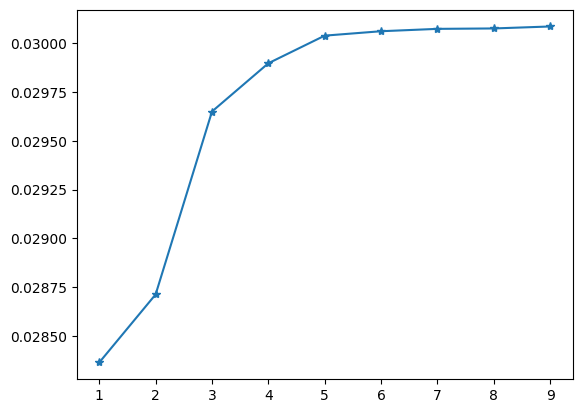

In [38]:
import numpy as np #for array operation
import pandas as pd #creating dataframes
import seaborn as sns #for advanced plots
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([0.02836367111163014,0.02871270472145602,0.02965086686844365,0.029898381005982366,0.03004000578016197,0.030062608106095047
              ,0.03007476049918083,0.030076894657995613,0.03008699351848563])


plt.plot(x,y,marker='*')
plt.show

#### b.Backward Selection

In [40]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

forward_selector = SequentialFeatureSelector(LinearRegression(),
                                             k_features = 9,
                                             forward=False, 
                                             verbose=2,
                                             scoring = 'r2').fit(x_train,y_train)


[2023-12-15 16:45:01] Features: 12/9 -- score: 0.03006637483709087
[2023-12-15 16:45:18] Features: 11/9 -- score: 0.030078587998695738
[2023-12-15 16:45:32] Features: 10/9 -- score: 0.030088485962810597
[2023-12-15 16:45:43] Features: 9/9 -- score: 0.03008699351848563

<function matplotlib.pyplot.show(close=None, block=None)>

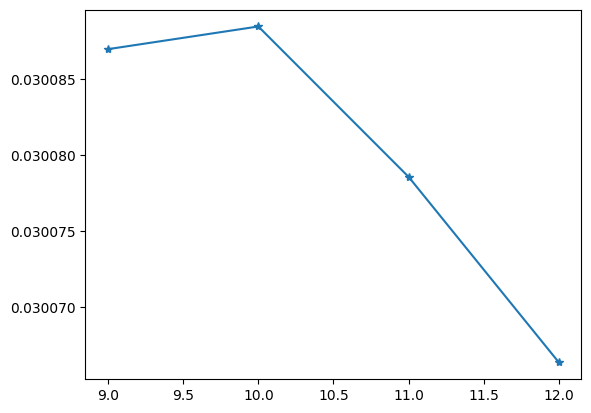

In [41]:
import numpy as np #for array operation
import pandas as pd #creating dataframes
import seaborn as sns #for advanced plots
import matplotlib.pyplot as plt
%matplotlib inline
x = np.array([12,11,10,9])
y = np.array([0.03006637483709087,0.030078587998695738,0.030088485962810597,0.03008699351848563])

plt.plot(x,y,marker='*')
plt.show

In [42]:
forward_selector.k_feature_names_

('1', '2', '4', '5', '7', '9', '10', '11', '12')

#### Backward Elimination

In [43]:

from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
backward_eliminator = SequentialFeatureSelector(LinearRegression(),
                                                k_features = 5,
                                                 forward = False, 
                                                 verbose = 2,
                                                 scoring = 'r2').fit(x_train,y_train)


[2023-12-15 16:48:32] Features: 12/5 -- score: 0.03006637483709087
[2023-12-15 16:48:48] Features: 11/5 -- score: 0.030078587998695738
[2023-12-15 16:49:02] Features: 10/5 -- score: 0.030088485962810597
[2023-12-15 16:49:13] Features: 9/5 -- score: 0.03008699351848563
[2023-12-15 16:49:22] Features: 8/5 -- score: 0.03008247177938861
[2023-12-15 16:49:29] Features: 7/5 -- score: 0.0300681183780112
[2023-12-15 16:49:34] Features: 6/5 -- score: 0.030045822559422654
[2023-12-15 16:49:38] Features: 5/5 -- score: 0.03004000578016197

In [ ]:
backward_eliminator.k_feature_names_